In [10]:
#Loading NLTK
import nltk
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /Users/schibsted/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/schibsted/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/schibsted/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/schibsted/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
# read the text file
data = ''
with open('./text.txt', 'r') as myfile:
    data=myfile.read().replace('\n', ' ')
data

'Elon Musk has said his rocket firm SpaceX cannot continue indefinitely paying for Ukraine\'s Starlink internet service in his latest spat with Kyiv. In February, the world\'s richest man activated his company\'s satellite internet system in Ukraine to keep its military and people online. But last month the Tesla owner asked the Pentagon to fund the programme instead of him, according to US media. He recently provoked Kyiv\'s ire by suggesting it cede territory. "SpaceX is not asking to recoup past expenses, but also cannot fund the existing system indefinitely," Mr Musk tweeted on Friday, referring to his space company that makes the Starlink system Starlink works by providing broadband internet through a network of satellites. It has proven vital for Ukraine\'s military as it fights to retake Ukrainian land from Russia. Ukraine credited Starlink this week with helping to reboot its infrastructure in key areas following more than 100 Russian missile strikes But the programme costs $20

In [12]:
# Tokenize the text
tokens = word_tokenize(data)
len(tokens)

523

In [13]:
# Remove stop words and punctuation
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]
tokens = [w for w in tokens if w.isalpha()]
len(tokens)

294

In [14]:
# Lemmatize the text
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(w) for w in tokens]
len(tokens)

294

In [15]:
# Count the words
word_counts = Counter(tokens)
word_counts.most_common(10)

[('Musk', 10),
 ('Ukraine', 10),
 ('Mr', 9),
 ('Starlink', 6),
 ('Russia', 5),
 ('said', 4),
 ('month', 4),
 ('Ukrainian', 4),
 ('SpaceX', 3),
 ('internet', 3)]

/var/folders/6h/cvsb06851c9gkfcd72mdmwx00000gn/T/ipykernel_82320/3504674147.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 45)


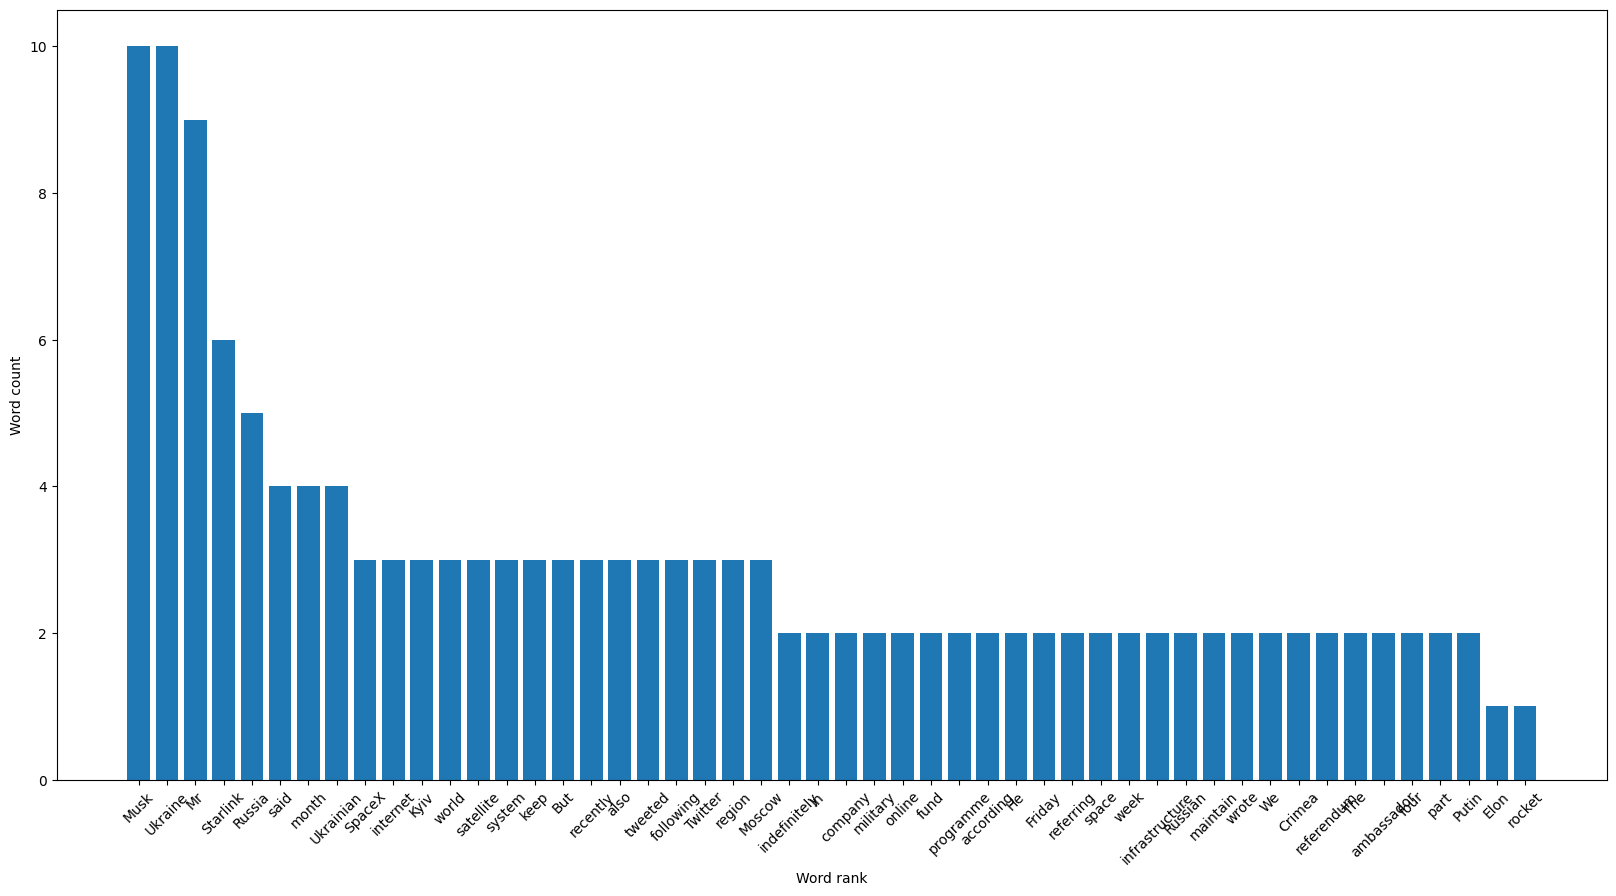

In [16]:
# Plot the results
import matplotlib.pyplot as plt
number_of_words = 50

x = [x[0] for x in word_counts.most_common(number_of_words)]
y = [x[1] for x in word_counts.most_common(number_of_words)]

plt.figure(figsize=(20,10))
ax = plt.gca()
ax.set_xticklabels(x, rotation = 45)
plt.bar(x, y)
plt.xlabel('Word rank')
plt.ylabel('Word count')
plt.show()


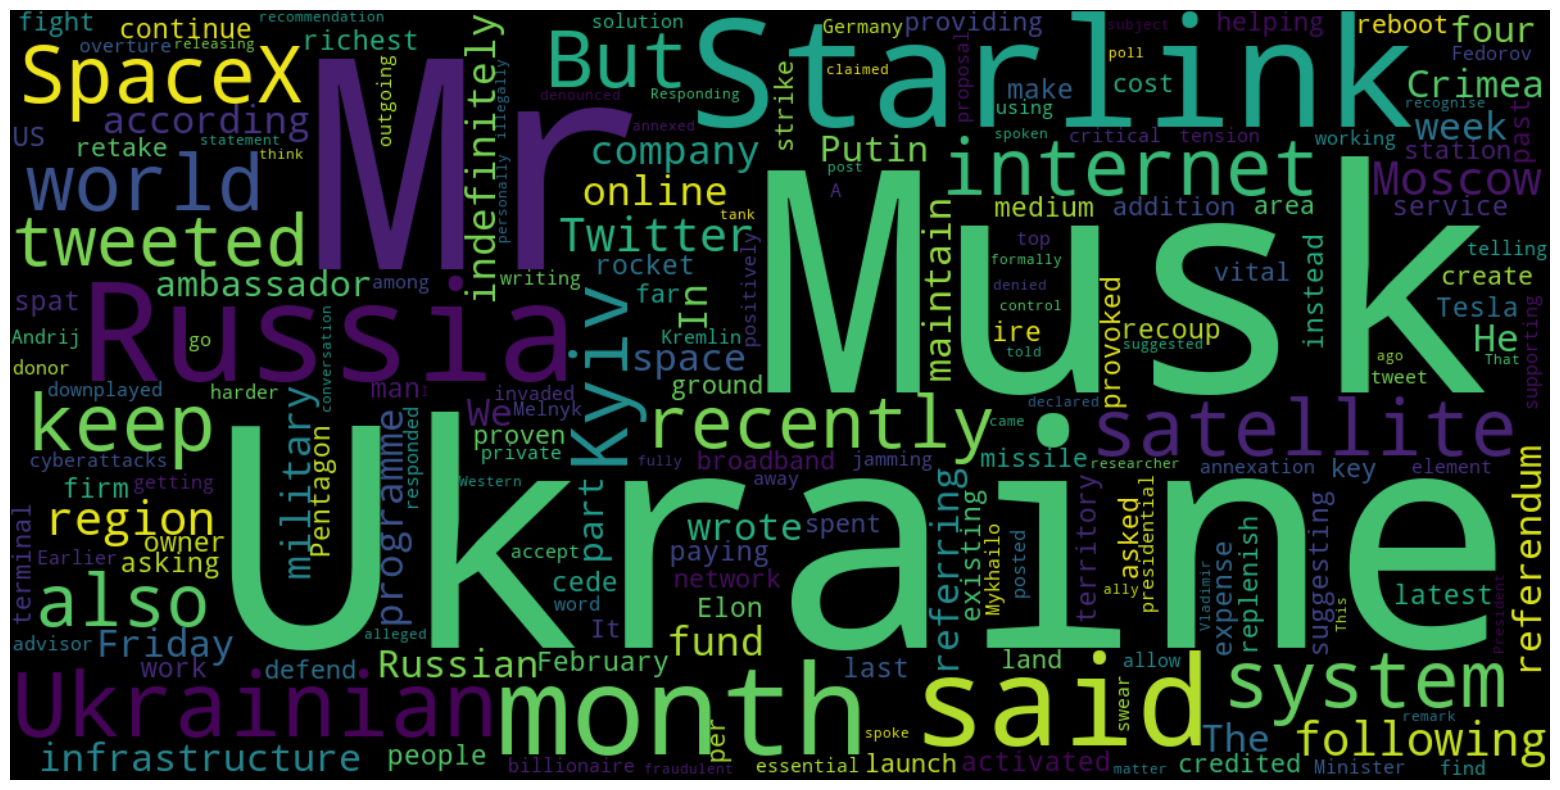

In [17]:
# Create a word cloud
wordcloud = WordCloud(width=1200, height=600).generate_from_frequencies(word_counts)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
